In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [2]:
# C:\Users\cuong\OneDrive\DataScience\Group-Project\Awesome-Group-Project\Combineddata.csv
zillow_data = pd.read_csv('Combineddata.csv')

In [3]:
zillow_data

,Unnamed: 0,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index,LastSold,Zindex
0,0,93123448,345560.0,256 Buckshot Ln,TIGER,30576.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",4.0,SingleFamily,4200.0,2001.0,290723.0,34.822040,-83.446890,10/1/2002,"165,300",285000.0,"OrderedDict([('@id', '14139'), ('@name', 'Tige..."
1,1,82452558,155747.0,65 Sunrise Dr,GRANTVILLE,30220.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",4.0,SingleFamily,1496.0,2006.0,118800.0,33.229140,-84.825290,11/19/2010,"113,700",54000.0,"OrderedDict([('@id', '45530'), ('@name', 'Gran..."
2,2,111793656,58879.0,2085 Jackson Rd,ROBERTA,31078.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",3.0,Mobile,1152.0,1995.0,57838.0,32.692290,-83.950920,2/12/2018,NaN,56750.0,"OrderedDict([('@id', '18858'), ('@name', 'Knox..."
3,3,2139757076,150542.0,6301 Chief O F Love Rd B-5,Savannah,31419.0,NaN,2.0,Condominium,1300.0,2008.0,NaN,31.993879,-81.281182,NaN,NaN,NaN,"OrderedDict([('@id', '763636'), ('@name', 'The..."
4,4,221933009,233334.0,1900 Bell Ln,Braselton,30517.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",0.0,SingleFamily,2653.0,2006.0,192468.0,34.108109,-83.790392,5/26/2017,"275,900",210999.0,"OrderedDict([('@id', '41949'), ('@name', 'Bras..."
5,5,194194745,12994.0,2192 Pineville Rd,Buena Vista,31803.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",0.0,SingleFamily,912.0,1969.0,40464.0,32.276539,-84.545657,5/4/2006,NaN,29200.0,"OrderedDict([('@id', '51181'), ('@name', 'Buen..."
6,6,2088415872,187997.0,300 Peachtree St NE APT 23B,Atlanta,30308.0,NaN,1.0,Condominium,621.0,1962.0,NaN,33.763824,-84.386487,NaN,"191,200",NaN,"OrderedDict([('@id', '269306'), ('@name', 'Dow..."
7,7,94736617,40795.0,114 Red Rd,WRAY,31798.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",2.0,SingleFamily,804.0,1977.0,30202.0,31.775404,-83.010673,3/23/2018,NaN,39900.0,NaN
8,8,69412110,46476.0,887 Old Babb Rd,ROCKY FACE,30740.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",NaN,Mobile,1120.0,1990.0,23037.0,34.740660,-85.046656,1/1/1997,"142,200",9000.0,"OrderedDict([('@id', '56279'), ('@name', 'Rock..."
9,9,238946371,109175.0,20 Red Oak Rd,Colquitt,39837.0,"OrderedDict([('@currency', 'USD'), ('#text', '...",2.0,SingleFamily,1568.0,2006.0,48737.0,31.121459,-84.694656,8/23/2005,NaN,10000.0,NaN


In [4]:
selected=['Zestimate', 'ZipCode','City',\
          'Bedrooms', 'typeofhome', 'Squareft', 'YearBuilt', 'CountTax',\
          'LastSold','Z_index']
dfreg=zillow_data[selected]
dfreg.City=dfreg.City.map(lambda x: x.upper())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
dfreg.head()

,Zestimate,ZipCode,City,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,LastSold,Z_index
0,345560.0,30576.0,TIGER,4.0,SingleFamily,4200.0,2001.0,290723.0,285000.0,"165,300"
1,155747.0,30220.0,GRANTVILLE,4.0,SingleFamily,1496.0,2006.0,118800.0,54000.0,"113,700"
2,58879.0,31078.0,ROBERTA,3.0,Mobile,1152.0,1995.0,57838.0,56750.0,NaN
3,150542.0,31419.0,SAVANNAH,2.0,Condominium,1300.0,2008.0,NaN,NaN,NaN
4,233334.0,30517.0,BRASELTON,0.0,SingleFamily,2653.0,2006.0,192468.0,210999.0,"275,900"


In [6]:
dfreg=zillow_data[selected]
dfreg.City=dfreg.City.map(lambda x: x.upper())
dselect=dfreg[['LastSold', 'Bedrooms','YearBuilt','Squareft']]
dselect=dselect.dropna(how='any')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Univariate Regression

In [7]:
dselect=dfreg[['Bedrooms', 'LastSold']]
zdata=dselect.dropna(how='any')

dselect2=dfreg[['Bedrooms', 'Zestimate']]
zdata2=dselect2.dropna(how='any')

In [8]:
X = zdata['Bedrooms']
Y = zdata['LastSold']

Xa = zdata2['Bedrooms']
Ya = zdata2['Zestimate']


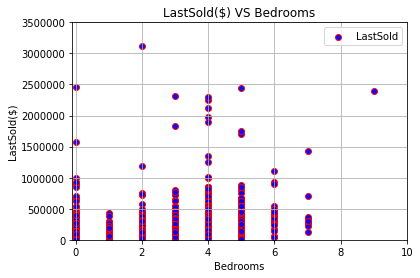

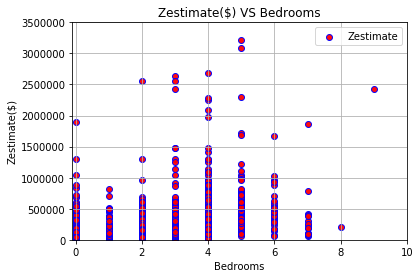

In [9]:

plt.scatter(X,Y,alpha=0.95,c='b',edgecolor = 'r')
plt.xlabel('Bedrooms')
plt.ylabel('LastSold($)')
plt.ylim(0,3500000)
plt.xlim(-0.1,10)
plt.legend()
plt.grid()
plt.title('LastSold($) VS Bedrooms')
plt.show()


plt.scatter(Xa,Ya,alpha=0.95,c='r',edgecolor = 'b')
plt.xlabel('Bedrooms')
plt.ylabel('Zestimate($)')
plt.ylim(0,3500000)
plt.xlim(-0.1,10)
plt.legend()
plt.grid()
plt.title('Zestimate($) VS Bedrooms')
plt.show()

In [10]:
dselect=dfreg[['Squareft', 'LastSold']]
zdata=dselect.dropna(how='any')

dselect2=dfreg[['Squareft', 'Zestimate']]
zdata2=dselect2.dropna(how='any')

In [11]:
X1 = zdata['Squareft']
Y1 = zdata['LastSold']

Xb = zdata2['Squareft']
Yb = zdata2['Zestimate']

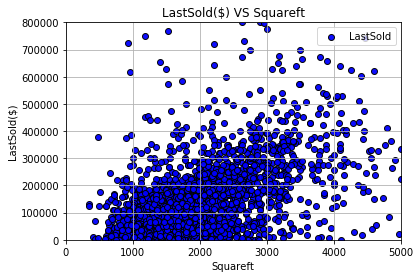

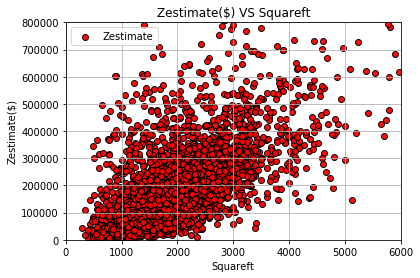

In [12]:
plt.scatter(X1,Y1,alpha=0.95,c='b',edgecolor = 'black')
plt.xlabel('Squareft')
plt.ylabel('LastSold($)')
plt.ylim(0,800000)
plt.xlim(-0.1,5000)
plt.legend()
plt.grid()
plt.title('LastSold($) VS Squareft')
plt.show()

plt.scatter(Xb,Yb,alpha=0.95,c='r',edgecolor = 'black')
plt.xlabel('Squareft')
plt.ylabel('Zestimate($)')
plt.ylim(0,800000)
plt.xlim(-0.1,6000)
plt.legend()
plt.grid()
plt.title('Zestimate($) VS Squareft')
plt.show()

In [13]:
dselect=dfreg[['YearBuilt', 'LastSold']]
zdata=dselect.dropna(how='any')

dselect2=dfreg[['YearBuilt', 'Zestimate']]
zdata2=dselect2.dropna(how='any')

In [14]:
X2 = zdata['YearBuilt']
Y2 = zdata['LastSold']

Xc = zdata2['YearBuilt']
Yc = zdata2['Zestimate']

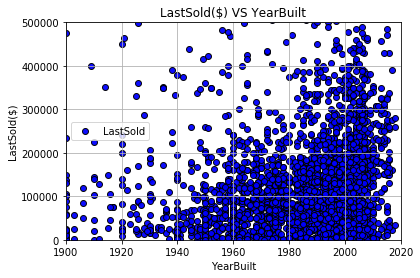

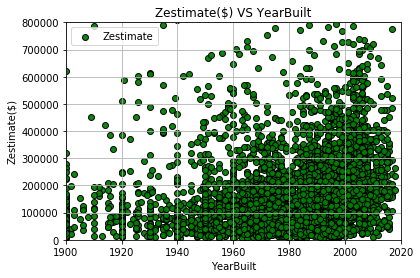

In [15]:
plt.scatter(X2,Y2,alpha=0.95,c='b',edgecolor = 'k')
plt.xlabel('YearBuilt')
plt.ylabel('LastSold($)')
plt.ylim(0,500000)
plt.xlim(1900,2020)
plt.legend()
plt.grid()
plt.title('LastSold($) VS YearBuilt')
plt.show()


plt.scatter(Xc,Yc,alpha=0.95,c='g',edgecolor = 'k')
plt.xlabel('YearBuilt')
plt.ylabel('Zestimate($)')
plt.ylim(0,800000)
plt.xlim(1900,2020)
plt.legend()
plt.grid()
plt.title('Zestimate($) VS YearBuilt')
plt.show()